#id: puddleworld-v0
Implementation of sarsalambda

Direction considers as:
           NORTH
            ^
            |
            |
WEST <------ ------>EAST
            |
            |
            ~
          SOUTH

In [1]:
import gym
import gym_grid_puddle_world
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_ploicy(ploicy_matrix, goal_position):
    
    img2 = plt.imread("im2.png")
    img3 = plt.imread("im3.png")
    img4 = plt.imread("im4.jpeg")
    img5 = plt.imread("im5.png")

    # up = arrow(0.5, .1, 0, 0.3,  width = .1, facecolor = 'black') ====   0
    # down = arrow(0.5, .9, 0, -.3,  width = .1, facecolor = 'black') ==== 3
    # right = arrow(0.1, .5, 0.3, 0,  width = .1, facecolor = 'black') ==== 1
    # left = arrow(0.9, .5, -0.3, 0,  width = .1, facecolor = 'black') ==== 2


    fig, axes = plt.subplots(nrows = 12, ncols = 12, figsize=(10,10))
    plt.subplots_adjust( wspace=0, hspace=0)
    p =1
    for i in range(len(axes)):
        for j in range(len(axes[0])):

            axes[i,j].set_facecolor('lightgrey')
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if 1<i<9 and 2<j<9:
                 axes[i,j].set_facecolor('darkgrey')
            if 2<i<8 and 3<j<8:
                 axes[i,j].set_facecolor('dimgray')
            if 3<i<7 and 4<j<7:
                 axes[i,j].set_facecolor('black')
            if (i == (6) or i == 5) and j == 6 :
                axes[i,j].set_facecolor('dimgray')
            if (i == (6) or i == 7) and j == 7 :
                axes[i,j].set_facecolor('darkgrey')
            if (i == (7) or i == 8) and j == 8 :
                axes[i,j].set_facecolor('lightgrey')
            if i in [5,6,10,11] and j ==0:
# 
                axes[i,j].set_facecolor('blue')
            if i == 0 and j == 11 and goal_position == 0:
                axes[i,j].imshow(img3)
            if i == 2 and j == 9 and goal_position == 1:
                axes[i,j].imshow(img4)
            if i == 6 and j == 7 and goal_position == 2:
                axes[i,j].imshow(img5)

    #         if i not in [0,2,6] and j not in [11,9,7]:
            p = ploicy_matrix[i,j]
            if p == 0:
                axes[i,j].arrow(0.5, .1, 0, 0.3,  width = .1, facecolor = 'green')

            elif p ==1 :
                axes[i,j].arrow(0.1, .5, 0.3, 0,  width = .1, facecolor = 'green')
            elif p==2:
                axes[i,j].arrow(0.9, .5, -0.3, 0,  width = .1, facecolor = 'green')
            elif p == 3:
                axes[i,j].arrow(0.5, .9, 0, -.3,  width = .1, facecolor = 'green')

    plt.show()


In [3]:
class SarsaLambda:
    def epsilon_action(self,environment, Q_values, current_state,epsilon):
        if np.random.uniform(0,1) < epsilon :
            action = environment.take_random_action()
            
        else:
            action = np.argmax(Q_values[:,current_state[0],current_state[1]])
           
        return action
    
    def test_action(self,environment, Q_values, current_state):
        action = np.argmax(Q_values[:,current_state[0],current_state[1]])
        return action
    
    def update_EQ_values(self, environment, alpha, gamma,lambdaa, current_state, current_action, reward_generated, next_state,next_acton, Q_values, E_values):
        error = reward_generated + (gamma*Q_values[next_acton][next_state[0],next_state[1]]) - Q_values[current_action][current_state[0],current_state[1]]
        E_values[current_action,current_state[0],current_state[1]] += 1
        for i in range(environment.action_space.n):
            for j in range( environment.observation_space.shape[0]):
                for k in range( environment.observation_space.shape[1]):
                    Q_values[i,j,k] = Q_values[i,j,k] + alpha*error*E_values[i,j,k]
                    E_values[i,j,k] = gamma*lambdaa*E_values[i,j,k]
            
      
        
        return Q_values
    
    def run_episode(self, environment, epsilon, gamma, alpha,lambdaa, goal_position, Q_values):
        E_values = np.zeros((environment.action_space.n, environment.observation_space.shape[0], environment.observation_space.shape[1]))
        current_state = environment.reset()
        
        current_action = self.epsilon_action(environment,Q_values,current_state, epsilon) 
        step_count = 0
        total_reward = 0
        i = 0
        while i<1000:
            #print(current_state)
            next_state, reward = environment.step(current_state,current_action )
            next_action = self.epsilon_action(environment,Q_values,next_state, epsilon)
            
            step_count = step_count +1
            
            total_reward = total_reward + reward
            Qvalue = self.update_EQ_values(environment, alpha, gamma,lambdaa, current_state, current_action, reward, next_state,next_action, Q_values, E_values)
            if next_state == goal_position:
#                 print("bro")
                break
            current_state = next_state
            current_action = next_action
            i +=1
        return step_count, total_reward, Qvalue
    
    def test(self,environment, epsilon, Q_values, goal_position):
        print("goal",goal_position)
        step_count = 0
        total_reward = 0
        state_collection = []
        current_state = environment.reset()
        state_collection.append(current_state)
        print(current_state)
        current_action = self.epsilon_action(environment,Q_values,current_state, epsilon) 
        while True:
            print(current_state)
            step_count = step_count + 1
            current_state, reward = environment.step(current_state,current_action )
            current_action = self.test_action(environment,Q_values,current_state, epsilon) 
            total_reward = total_reward + reward 
            state_collection.append(current_state)
            if current_state == goal_position:
                break
        return step_count, total_reward, state_collection
    


/home/unigalso/miniconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


experiment_no. = 0


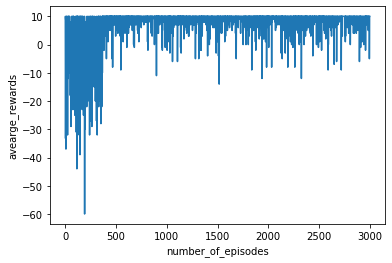

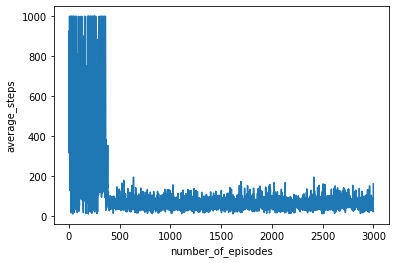

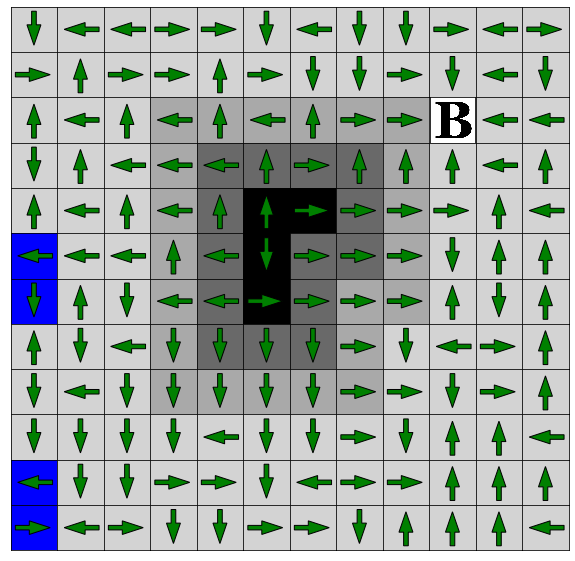

In [16]:

number_of_episodes = 3000
gamma = 0.5


lambdaa = 1
experiments = 1
goal_position = 'B'
goal_dictionary = {'A':0, 'B':1, 'C':2}
environment = gym.make('puddleworld-v0')
sarsaLambda_obj = SarsaLambda()
rewards = np.zeros((experiments, number_of_episodes))
steps =  np.zeros((experiments, number_of_episodes))
p = environment.setting_goal(goal_position)
test_steps =np.zeros((experiments, 20))
for i in range(experiments):
    epsilon = 1
    decay_count = 0
    alpha = 0.5
    Q_values = np.random.rand(environment.action_space.n, environment.observation_space.shape[0], environment.observation_space.shape[1])
    for j in range(number_of_episodes):
        step_count, total_reward, Q = sarsaLambda_obj.run_episode(environment, epsilon, gamma, alpha,lambdaa, p, Q_values)
        rewards[i,j] = total_reward
        steps[i,j] = step_count
        if j%(number_of_episodes/100) == 0  and j>(number_of_episodes/10):
            decay_count +=1
            epsilon = epsilon/(decay_count)
            alpha = alpha/(decay_count)
#             

    
    print("experiment_no. =",i)

avearge_rewards = np.mean(rewards,0)
average_steps = np.mean(steps,0)
average_test_steps = np.mean(test_steps,0)
plt.plot(np.arange(number_of_episodes), avearge_rewards)
plt.xlabel("number_of_episodes")
plt.ylabel("avearge_rewards")
plt.show()
plt.close()
plt.plot(np.arange(number_of_episodes), average_steps)
plt.xlabel("number_of_episodes")
plt.ylabel("average_steps")
plt.show()
plt.close()

best_action = np.zeros((environment.observation_space.shape[0],environment.observation_space.shape[1]))
for i in range(environment.observation_space.shape[0]):
    for j in range(environment.observation_space.shape[1]):
        best_action[i,j] = np.argmax(Q[:,i,j])
plot_ploicy(best_action,goal_dictionary[goal_position])
